In [ ]:

data = pd.read_csv('/content/data1 - data2.csv')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
layers = keras.layers
models = keras.models


# This code was tested with TensorFlow v1.8
print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 1.14.0


In [ ]:
data['Category'].unique()

array(['ছড়া', 'চিরায়ত উপন্যাস', 'বাংলা কবিতা', 'সমকালীন উপন্যাস'],
      dtype=object)

In [ ]:
print(data['Category'].value_counts().sort_values)

<bound method Series.sort_values of ছড়া                1500
বাংলা কবিতা        1500
সমকালীন উপন্যাস    1500
চিরায়ত উপন্যাস     1464
Name: Category, dtype: int64>


In [ ]:
data.head()

,Title,Category
0,ছড়ার ছন্দে জীবনানন্দে,ছড়া
1,ছড়ার বাড়ী তেপান্তরে,ছড়া
2,ছড়া আমাকে আদর দিও,ছড়া
3,রোদ ফিরে যাক পাতার কোলে,ছড়া
4,ধিতাং ধিতাং,ছড়া


In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)

In [ ]:

data.head(10)

,Title,Category
1555,আনন্দমঠ,চিরায়ত উপন্যাস
5679,"দ্বিতীয় প্রেম, প্রথম খেলার আগে",সমকালীন উপন্যাস
158,ইষ্টি কুটুম মিষ্টি কুটুম,ছড়া
4974,দ্বিতীয় প্রেম,সমকালীন উপন্যাস
4164,ব্যস্তমনের বহিঃপ্রকাশ,বাংলা কবিতা
262,নানার মস্ত বাড়ী,ছড়া
2628,প্রতীক্ষার সুখ,চিরায়ত উপন্যাস
2108,চোখের বালি,চিরায়ত উপন্যাস
1619,দুর্গেশনন্দিনী,চিরায়ত উপন্যাস
4911,ফিরে এসো,সমকালীন উপন্যাস


In [ ]:
train_size = int(len(data) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

Train size: 4174
Test size: 1790


In [ ]:
def train_test_split(data, train_size):
    train = data[:train_size]
    test = data[train_size:]
    return train, test

In [ ]:
train_cat, test_cat = train_test_split(data['Category'], train_size)
train_text, test_text = train_test_split(data['Title'], train_size)

In [ ]:
max_words = 1000
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words, 
                                              char_level=False)

In [ ]:
tokenize.fit_on_texts(train_text) # fit tokenizer to our training text data
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

In [ ]:
encoder = LabelEncoder()
#dummy_train = pd.get_dummies(train_cat)
#dummy_new = pd.get_dummies(new_data)
#dummy_new.reindex(columns = dummy_train.columns, fill_value=0)
#encoder.fit(train_cat)
#y_train = encoder.transform(train_cat)
#y_test = encoder.transform(test_cat)

encoder.fit(train_cat)
#test_cat = test_cat.map(lambda s: '<unknown>' if s not in encoder.classes_ else s)
#encoder.classes_ = np.append(encoder.classes_, '<unknown>')
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

In [ ]:
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


x_train shape: (4174, 1000)
x_test shape: (1790, 1000)
y_train shape: (4174, 4)
y_test shape: (1790, 4)


In [ ]:
batch_size = 50
epochs = 50
drop_ratio = 0.4

In [ ]:
# Build the model
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(max_words,)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(256, input_shape=(max_words,)))
model.add(layers.Activation('relu'))
#model.add(layers.Dense(128, input_shape=(max_words,)))
#model.add(layers.Activation('relu'))
#model.add(layers.Dropout(drop_ratio))
model.add(layers.Dense(4))
model.add(layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               512512    
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 1028      
_________________________________________________________________
activation_15 (Activation)   (None, 4)                 0         
Total params: 644,868
Trainable params: 644,868
Non-trainable params: 0
________________________________________________

In [ ]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG


In [ ]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

TypeError: ignored

In [ ]:
# model.fit trains the model
# The validation_split param tells Keras what % of our training data should be used in the validation set
# You can see the validation loss decreasing slowly when you run this
# Because val_loss is no longer decreasing we stop training to prevent overfitting
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 3756 samples, validate on 418 samples
Epoch 1/50
3756/3756 [==============================] - 1s 138us/sample - loss: 1.1003 - acc: 0.5442 - val_loss: 0.8341 - val_acc: 0.6100
Epoch 2/50
3756/3756 [==============================] - 0s 94us/sample - loss: 0.6507 - acc: 0.7292 - val_loss: 0.8312 - val_acc: 0.6220
Epoch 3/50
3756/3756 [==============================] - 0s 95us/sample - loss: 0.5119 - acc: 0.7729 - val_loss: 0.8929 - val_acc: 0.6411
Epoch 4/50
3756/3756 [==============================] - 0s 95us/sample - loss: 0.4362 - acc: 0.8120 - val_loss: 0.9887 - val_acc: 0.6411
Epoch 5/50
3756/3756 [==============================] - 0s 95us/sample - loss: 0.4024 - acc: 0.8208 - val_loss: 1.0677 - val_acc: 0.6388
Epoch 6/50
3756/3756 [==============================] - 0s 90us/sample - loss: 0.3825 - acc: 0.8235 - val_loss: 1.1089 - val_acc: 0.6507
Epoch 7/50
3756/3756 [==============================] - 0s 98us/sample - loss: 0.3779 - acc: 0.8243 - val_loss: 1.1846 - val_acc: 

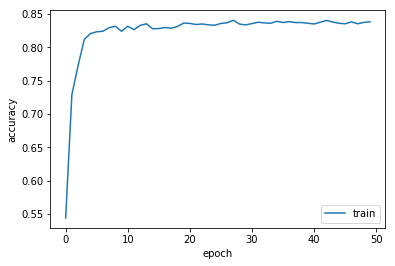

In [ ]:


import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [ ]:
def run_experiment(batch_size, epochs, drop_ratio):
  print('batch size: {}, epochs: {}, drop_ratio: {}'.format(
      batch_size, epochs, drop_ratio))
  model = models.Sequential()
  model.add(layers.Dense(512, input_shape=(max_words,)))
  model.add(layers.Activation('relu'))
  model.add(layers.Dropout(drop_ratio))
  model.add(layers.Dense(num_classes))
  model.add(layers.Activation('softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_split=0.1)
  score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=0)
  print('\tTest loss:', score[0])
  print('\tTest accuracy:', score[1])

In [ ]:
atch_size = 16
epochs = 4
drop_ratio = 0.4
run_experiment(batch_size, epochs, drop_ratio)

batch size: 50, epochs: 4, drop_ratio: 0.4
	Test loss: 0.8288721751900359
	Test accuracy: 0.6195531


In [ ]:
text_labels = encoder.classes_ 

for i in range(20):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_text.iloc[i][:50], "...")
    print('Actual label:' + test_cat.iloc[i])
    print("Predicted label: " + predicted_label + "\n")  

রামের সুমতি ...
Actual label:চিরায়ত উপন্যাস
Predicted label: চিরায়ত উপন্যাস

পদ্মা নদীর মাঝি ...
Actual label:চিরায়ত উপন্যাস
Predicted label: চিরায়ত উপন্যাস

কালিদাসের শকুন্তলা ...
Actual label:চিরায়ত উপন্যাস
Predicted label: চিরায়ত উপন্যাস

ইছামতী (রবীন্দ্র পুরস্কারপ্রাপ্ত) ...
Actual label:চিরায়ত উপন্যাস
Predicted label: চিরায়ত উপন্যাস

অচেনা পথে ...
Actual label:সমকালীন উপন্যাস
Predicted label: সমকালীন উপন্যাস

পঞ্চগ্রাম ...
Actual label:চিরায়ত উপন্যাস
Predicted label: চিরায়ত উপন্যাস

অন্ধকারের হায়েনা ...
Actual label:সমকালীন উপন্যাস
Predicted label: সমকালীন উপন্যাস

বিরহ বলয় ...
Actual label:সমকালীন উপন্যাস
Predicted label: সমকালীন উপন্যাস

টম এন্ড জেরির ছড়া ...
Actual label:ছড়া
Predicted label: ছড়া

নীল ময়ূরের যৌবন ...
Actual label:সমকালীন উপন্যাস
Predicted label: সমকালীন উপন্যাস

মেঘ নয় কবিতা রাশি রাশি ...
Actual label:বাংলা কবিতা
Predicted label: বাংলা কবিতা

ধূসর সীমান্তে ...
Actual label:সমকালীন উপন্যাস
Predicted label: বাংলা কবিতা

তবু স্বপ্ন দেখি ...
Actual label:বাংলা কবিতা

In [ ]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [ ]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='/content/kalpurush.ttf')

# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=10,fontproperties=prop)
    plt.yticks(tick_marks, classes, fontsize=10, fontproperties=prop)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=10)
    plt.xlabel('Predicted label', fontsize=10)



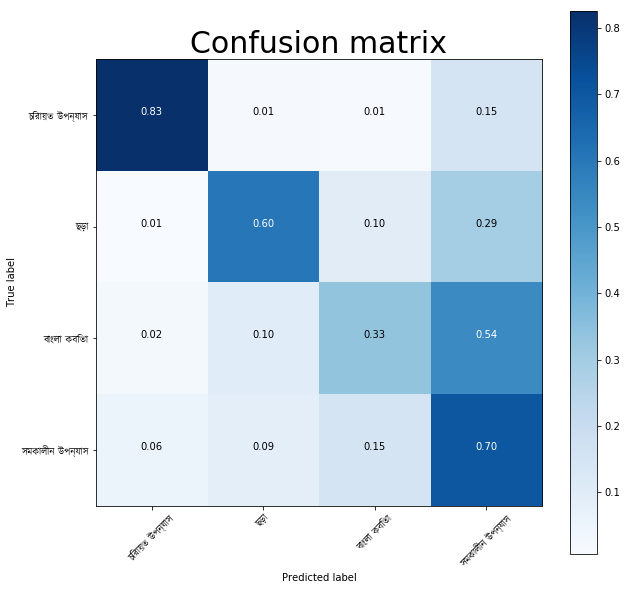

In [ ]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()